In [ ]:
#YouTube: https://youtu.be/XQAVLy2J7ic

In [220]:
import numpy as np
import matplotlib.pyplot as plt 


def gameoflife(s, p, t):
    '''This function simulates game of life and visualizes it'''
    
    board = conway(s, p)
    arr = advance(board, t)
    plot(s, t, arr)


def conway(s, p=0.1): # s-->size, p-->probability
        '''This function creats a board which is a square two dimentional numpy array'''
        
        #creates arrays with random floats over the interval [0,1)
        board = (np.random.random((s, s))>(1-p)).astype(int) 
        return board



def advance(b, t): #b-->board, t-->t times
        '''This function simulates the advance process of game of life'''
        arr = [[] for _ in range(t+1)]
        arr[0].append(b.copy())

        j = 1
        
        while t>0:

                rows = len(b)
                cols = len(b[0])

                #iterate cell by cell
                for r in range(rows): 
                        for c in range(cols): 

                                # the original cell is live
                                if b[r][c] == 1:
                                        live_n = count(b, r, c)  
                                        if (live_n < 2) or (live_n > 3):
                                                b[r][c] = -1 # dead
                                        else: pass
                                
                                # the original cell is dead
                                if b[r][c] == 0:
                                        live_n = count(b, r, c)  
                                        if live_n == 3:
                                                b[r][c] = 2 # live

                b = update(b)
                arr[j].append(b.copy())

                j += 1
                t -= 1
        
        return arr
        

def plot(s,t,arr):
    '''This function plots the advance process of game of life'''
    fig=plt.figure(figsize=(8, 8)) #create a fig

    for i in range(t+1): 
    
        img = arr[i][0]
        fig.add_subplot(1,(t+1),(i+1))
        plt.imshow(img, cmap='binary')
        
        
def count(b, r, c):
        '''This fucntion counts the number of live neighboring cells for a cell'''
        #creat a list for iterating neighbors later
        neighbors = [(1,0), (1,-1), (0,-1), (-1,-1), (-1,0), (-1,1), (0,1), (1,1)]

        #set the initial number of live neigboring cells is 0
        live_neighbors = 0

        for neighbor in neighbors:
                n_r = r + neighbor[0]
                n_c = c + neighbor[1]

                if ((n_r >= 0) and (n_r < len(b)) and (n_c >= 0) and (n_c < len(b[0]))) and ((abs(b[n_r][n_c]) == 1)):
                     live_neighbors += 1

        return live_neighbors


def update(b):
        '''This function updates the board'''
        rows = len(b)
        cols = len(b[0])
        
        #iterate cell by cell
        for r in range(rows): 
                for c in range(cols): 
                        if b[r][c] == -1: 
                                b[r][c] = 0
                        elif b[r][c] == 2:
                                b[r][c] = 1

        return b

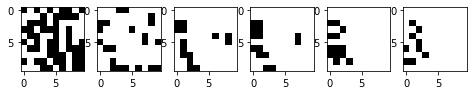

In [258]:
gameoflife(10, 0.5, 5)

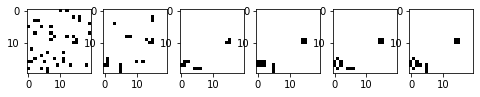

In [261]:
gameoflife(20, 0.1, 5)

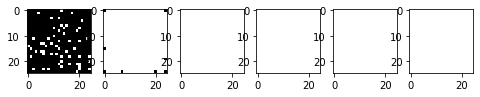

In [256]:
gameoflife(25, 0.9, 5)